In [2]:
import numpy as np
import pandas as pd
import math
import csv
import random
import matplotlib.pyplot as plt
import seaborn as sns
import IndicesPackage as ind


from operator import itemgetter
%matplotlib inline

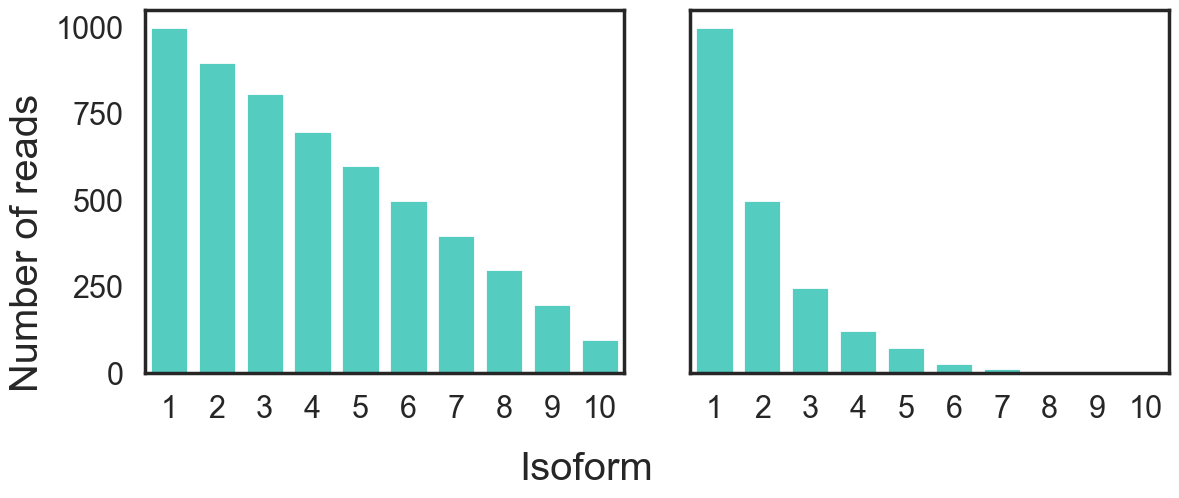

In [5]:
sns.set_context('poster')
sns.set_style("white")
fig, axes = plt.subplots(ncols= 2, nrows=1, figsize=(12,5), sharey=True)
sns.barplot(x = [1,2,3,4,5,6,7,8,9,10] ,y=[1000,900,810,700,600,500,400,300,200,100], ax=axes[0], color='turquoise')
axes[0].set(xticks = np.arange(0,10))

sns.barplot(x = [1,2,3,4,5,6,7,8,9,10] ,y=[1000,500,250,125,75,30,15,7,3,1], ax=axes[1], color='turquoise')
axes[1].set(xticks = np.arange(0,10))
fig.supxlabel('Isoform')
fig.supylabel('Number of reads')
fig.tight_layout(pad=0.5, w_pad=2)

plt.savefig('methods.png', format='png',bbox_inches='tight', dpi=300)

# Things to notice so far
$\textbf{UP TO DATE - 27/12/2022}$
$\newline$

$\textbf{1}$ - Shannon Diversity index - Shannon's index computes the total readings only. The index gives relativly low values when the sample size is small - meaning the number of potential splice sites doesn't affect this index's value. We need to consider it, because there are at most 5 isoforms of each gene.  

$\textbf{2}$ - 


### Parameters of all indices functions

each index function takes 4 parameters:  $\textbf{index_function (sequence, possible_ss, total_reads, total_ss)}$

$\textbf{'sequence'}$ - list - it can refer to all possible intron start site / all possible intron end site / only the actual splice sites with readings >=1.

$\textbf{'possible_ss'}$ - int - all POSSIBLE intron start\end splice sites (including sites with 0 readings).  

$\textbf{'total_reads'}$ - int - stands for TOTAL readings from all splice sites (sum of all readings).  

$\textbf{'total_ss'}$ - int - stand for only the actual splice sites with readings >=1.  

$\newline$
Indices names you have to use for calling them:  
'shannonDiv', 'brillouinDiv', 'simsponDiv', 'mcintoshDiv',  'simpsonDom', 'simpsonEve', 'camargoEve'

In [33]:
def randomlist1(arr_length, starting_sum, increase, index_name, spreading_percentage, filepath):
    """
    This function creates sequences where each element decrease exponentialy.
    Explantions for each parametere can be found at the end of this program 
    """
    
    percent4_list = []
    percent10_list = []
    percent20_list = []
    percent30_list = []
    percent40_list = []
    percent50_list = []
    sum_list = []
    j = 0
    
    
    for i in range (1000):
        
        #I define a different variable for each decrease, and the total reads jumps in 100 for each array
        n1 = n2 = n3 = n4 = n5 = n6 = total_reads = starting_sum+j
        
        mylist_10percent = [0]*arr_length
        mylist_20percent = [0]*arr_length
        mylist_30percent = [0]*arr_length
        mylist_40percent = [0]*arr_length
        mylist_50percent = [0]*arr_length
        mylist_4percent = [0]*arr_length
        
        
        #filling each array with the conditions we wanted
        for i in range(arr_length):
            mylist_10percent[i] = n1*(1/10) if (n1*(1/10) >= 1) else 0   #jumps of 10%
            mylist_20percent[i] = n2*(2/10) if (n2*(2/10) >= 1) else 0   #jumps of 20%
            mylist_30percent[i] = n3*(3/10) if (n3*(3/10) >= 1) else 0   #jumps of 30%
            mylist_40percent[i] = n4*(4/10) if (n4*(4/10) >= 1) else 0   #jumps of 40%
            mylist_50percent[i] = n5*(5/10) if (n5*(5/10) >= 1) else 0   #jumps of 50%
            mylist_4percent[i] = n6*(1/25) if (n6*(1/25) >= 1) else 0   #jumps of 4%
        
            #updating the total reads for each array
            n1 -= n1*(1/10)
            n2 -= n2*(2/10)
            n3 -= n3*(3/10)
            n4 -= n4*(4/10)
            n5 -= n5*(5/10)
            n6 -= n6*(1/25)
        
        
        #calcaulating the percentage we want
        p = math.ceil((total_reads*(spreading_percentage/100))/arr_length)
        if (p<1):
            p = math.ceil(p)
        
        #pseudo count;
#         p=1;
        
        #spreading the percentage we want on EVERY element in the array
        mylist_10percent = [x+p for x in mylist_10percent]
        mylist_20percent = [x+p for x in mylist_20percent]
        mylist_30percent = [x+p for x in mylist_30percent]
        mylist_40percent = [x+p for x in mylist_40percent]
        mylist_50percent = [x+p for x in mylist_50percent]
        mylist_4percent = [x+p for x in mylist_4percent]

        
        #CREATING ARRAYS
        percent10_list.append (mylist_10percent)
        percent20_list.append (mylist_20percent)
        percent30_list.append (mylist_30percent)
        percent40_list.append (mylist_40percent)
        percent50_list.append (mylist_50percent)
        percent4_list.append  (mylist_4percent)
        
        
        #computing the array's index, and putting the index's value and the array itself in a list
#         percent10_list.append(ind.indices (mylist_10percent, index_name))
#         percent20_list.append(ind.indices (mylist_20percent, index_name))
#         percent30_list.append(ind.indices (mylist_30percent, index_name))
#         percent40_list.append(ind.indices (mylist_40percent, index_name))
#         percent50_list.append(ind.indices (mylist_50percent, index_name))
#         percent4_list.append(ind.indices (mylist_4percent,   index_name))
#         sum_list.append(total_reads)
    
        j+=increase   #updating the next arrays sum

    #############END OF FOR LOOP
    
#     percent10 = np.array(percent10_list)
#     percent20 = np.array(percent20_list)
#     percent30 = np.array(percent30_list)
#     percent40 = np.array(percent40_list)
#     percent50 = np.array(percent50_list)
#     percent4  = np.array(percent4_list)
    
#     print("percent4 mean: " ,np.mean(percent4))
#     print("percent10 mean: ",np.mean(percent10))
#     print("percent20 mean: ",np.mean(percent20))
#     print("percent30 mean: ",np.mean(percent30))
#     print("percent40 mean: ",np.mean(percent40))
#     print("percent50 mean: ",np.mean(percent50))
    
    
    #creating a dataframe with all of the lists
#     lst = pd.DataFrame(list(zip(percent4_list, percent10_list, percent20_list, percent30_list,percent40_list,percent50_list, sum_list)),
#                       columns=['4%','10%','20%','30%','40%','50%', 'sum'])
    lst = pd.DataFrame(list(zip(percent4_list, percent10_list, percent20_list, percent30_list,percent40_list,percent50_list)),
                      columns=['4%','10%','20%','30%','40%','50%'])

    
    print("type is: ", type(lst.loc[0][0][0]))
    
    #creating the path
    filename = index_name + ", arr_len " + str(arr_length) + ", sum " + str(starting_sum) + ", increase " + str(increase) + ", spreading" + str(spreading_percentage)

    #exporting the lists using pandas
    lst.to_csv(filepath + filename + ".csv")
    
    
#     g = sns.boxplot(data = lst, color='turquoise')
#     plt.ylabel("Normalized\nShannon's Entropy")
#     plt.xlabel('\u0394 abundance\nof isoforms')
#     g.set_ylim(1.0,4.5)
    
    
    
#     plt.savefig('splicing (slope) figure.png', format='png',bbox_inches='tight', dpi=300)
    
    
     
#FOR ELIRON'S USE
filepath = "C:/Users/eliro/Desktop/Python/Biology Project/data by dates/"
    
randomlist1(arr_length=100, starting_sum=100, increase=100, index_name='shannonDiv', spreading_percentage=5, filepath=filepath)




#arr_length = the arrays length (gene's length)
#starting_sum = the sum of the first element. All the elements in the array add up to this sum.
#increase = first array sum is 'starting_sum', second array is 'starting_sum'+increase
#index_name = the index we want to compute - there is a list below of the different indexes
#spreading_percentage = the spreading percentage we want

#Indices names you have to use for calling them:
#'shannonDiv', 'brillouinDiv', 'simsponDiv', 'mcintoshDiv',  'simpsonDom', 'simpsonEve', 'camargoEve'



type is:  <class 'float'>


NameError: name 'percent10_list' is not defined

C:\Users\eliro\AppData\Local\Temp\ipykernel_6460\4228419798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([100,50, 25, 12.5, 5, 2.5, 1.25, 1, 1, 0,0,0,0,0], kde=False)


<AxesSubplot: >

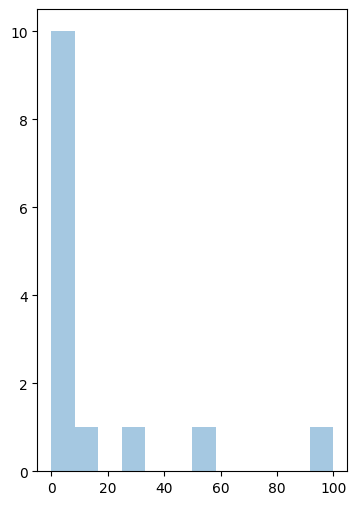

In [6]:
fig, ax= plt.subplots (nrows=1 , ncols=1 , figsize=(4,6))
sns.distplot([100,50, 25, 12.5, 5, 2.5, 1.25, 1, 1, 0,0,0,0,0], kde=False)



In [28]:
##CODE FOR THE POSTER - RESULTS - SEQUENCE LENGTH

#defining length of the arrays
long_length=1000
short_length=10

#defining the arrays 
long_arr = [0]*long_length
short_arr = [0]*short_length

#defining the total reads, and the percentage we want
total_reads = 200000
spreading_percentage=1

#putting values in only 3 cells
long_arr[0] = short_arr[0] = total_reads*(6/10)
long_arr[1] = short_arr[1] = total_reads*(3/10)
long_arr[2] = short_arr[2] = total_reads*(1/10)

#computing indexes values BEFORE spreading
short_div  = ind.indices(short_arr, 'shannonDiv')
short_eve = ind.indices(short_arr, 'shannonEve')
long_div = ind.indices(long_arr, 'shannonDiv')
long_eve = ind.indices(long_arr, 'shannonEve')


# #calcaulating the percentage we want to spread 
# p_long = (total_reads*(spreading_percentage/100))/long_length
# p_short = (total_reads*(spreading_percentage/100))/short_length
#with ceiling
p_long = math.ceil((total_reads*(spreading_percentage/100))/long_length)
p_short = math.ceil((total_reads*(spreading_percentage/100))/short_length)
        
#spreading the percentage we want on EVERY element in the array
long_arr = [x+p_long for x in long_arr]
short_arr = [x+p_short for x in short_arr]


# #printing the arrays
# print("long arr is: ", long_arr)
# print("\nshort arr is: ", short_arr)


#computing indexes values AFTER spreading
short_div_spread = ind.indices(short_arr, 'shannonDiv')
short_eve_spread = ind.indices(short_arr, 'shannonEve')
long_div_spread = ind.indices(long_arr, 'shannonDiv')
long_eve_spread = ind.indices(long_arr, 'shannonEve')


#H-H_spreading
H_short = short_div - short_div_spread
H_long = long_div - long_div_spread

#H-H_max
max_lst_short = [total_reads/short_length]*short_length
max_lst_long = [total_reads/long_length]*long_length
H_max_short = short_div - ind.indices(max_lst_short, 'shannonDiv')
H_max_long = long_div - ind.indices(max_lst_long, 'shannonDiv')


print("H-H_spreading: \nH_short is: ", H_short)
print("H_long is: ", H_long)
print("\nH-H_max: \nH_max_short: ", H_max_short)
print("H_max_long: ", H_max_long)


#printing the arrays
print("\nlong - div - NO spread: ", long_div)
print("short - div - NO spread: ", short_div)

print("\nlong - div - WITH spread: ", long_div_spread)
print("short - div - WITH spread: ", short_div_spread)

print("\nlong - eve - NO spread: ", long_eve)
print("short - eve - NO spread: ", short_eve)

print("\nlong - eve - WITH spread: ", long_eve_spread)
print("short - eve - WITH spread: ", short_eve_spread)




H-H_spreading: 
H_short is:  -0.04999999999999993
H_long is:  -0.11499999999999988

H-H_max: 
H_max_short:  -1.4049999999999998
H_max_long:  -6.010000000000001

long - div - NO spread:  0.898
short - div - NO spread:  0.898

long - div - WITH spread:  1.013
short - div - WITH spread:  0.948

long - eve - NO spread:  0.12999881491637338
short - eve - NO spread:  0.3899964447491201

long - eve - WITH spread:  0.14664677005599802
short - eve - WITH spread:  0.41171116884428266


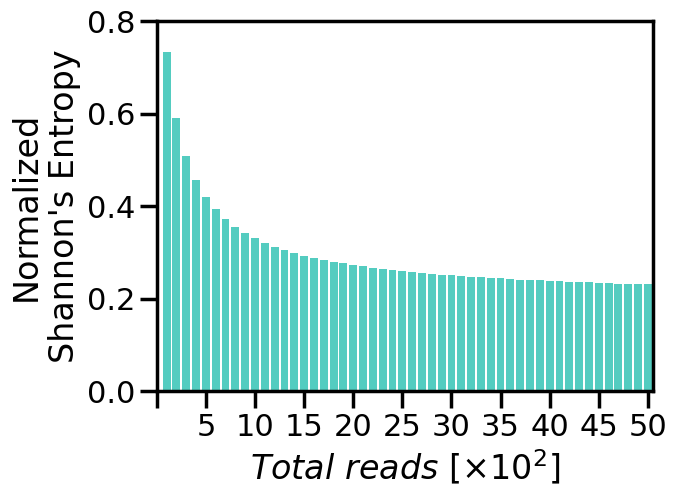

In [113]:
##CODE FOR THE POSTER - RESULTS - READ COVERAGE

def sum_varies (arr_length, starting_sum, increase, index_name, spreading_percentage, filepath):
        
    j=0
    sum_list = []
    index_list = []
    
    for _ in range (50):
        total_reads = starting_sum+j
        
        temp_list = [0]*arr_length
        
        temp_list[0] = total_reads*(60/100)
        temp_list[1] = total_reads*(30/100)
        temp_list[2] = total_reads*(10/100)
    
        #calculating the percentage we want
        p = math.ceil((total_reads*(spreading_percentage/100))/arr_length)
        
        if (p<1):
            p = math.ceil(p)
        
        #spreading the percentage we want on ALL ELEMENTS
        temp_list = [x+p for x in temp_list] 
        

        #appending to a list
        index_list.append(ind.indices (temp_list, index_name))
        sum_list.append(int(total_reads/100))
        
        j+=increase
    
    
    
    #creating the path
    filename = index_name + ", arr_len " + str(arr_length) + ", sum " + str(starting_sum) + ", increase " + str(increase) + ", spreading" + str(spreading_percentage)
    
    df = pd.DataFrame(list(zip(index_list, sum_list)), columns=["Normalized\nShannon's Entropy", r'$Total~reads~[\times 10^{2}]$'])
    
   
    sns.set_context('poster')
    
    g = sns.barplot(data = df, x = r'$Total~reads~[\times 10^{2}]$' , y = "Normalized\nShannon's Entropy", color='turquoise')
    plt.xticks([-1,4,9,14,19,24,29,34,39,44,49])
    g.set_ylim(0,0.8)
    
    
    plt.savefig('read coverage figure.png', format='png',bbox_inches='tight', dpi=300)
    
    

    #exporting the lists using pandas
    df.to_csv(filepath + filename + ".csv")

    
filepath = "C:/Users/eliro/Desktop/Python/Biology Project/data by dates/"
    
sum_varies(arr_length=100, starting_sum=100, increase=100, index_name='shannonEve', spreading_percentage=1, filepath=filepath)


In [85]:
def evenness (t, n, p):
    
    
    return((((t*60/100)+p)/t)*math.log(((t*60/100)+p)/t)+
          (((t*60/100)+p)/t)*math.log((((t*60/100)+p)/t))+
          ((((t*60/100)+p)/t))*math.log((((t*60/100)+p)/t))+
          (((n-3)*p)/t)*math.log(p/t))

t = total_reads = 2500
n = 100
p = (total_reads*(spreading_percentage/100))/n


print(evenness(t, n, p)/math.log(n))

-0.21903200236649825


In [ ]:
def randomlist2():
    """
    This function creates random sequences.
    The sequence's length varies from 1 to 5.
    The sum of the total readings varies from 2 to 20000
    """
    
    randomlist = [0] * 120
    
    
    #creates a random num of isoforms, and random number of readings for each of them
    isoforms = random.randint(2,5)    
    for i in range (isoforms):
        randomlist[i] = random.random()

    #This is an idea on how to pick random numbers. I need to think more about it
#     for i in range(n):
#         arr[randint(0,n) % m] += 1
    
    
    #fills all the zeros in the array with the 1% of the total reading spread all over the (120 - # of isoforms) cells
    p = percentage (randomlist, 1)
    randomlist = [isoform if isoform != 0 else p for isoform in randomlist]
    
    
    #creates a random total readings number
    n2 = 10
    
    
    total_reads = sum(randomlist)
    
    #every number in the sequence is divided by the total reads, and multiplyed by the wanted sum of total reads (ranges between 2-20,000)
    randomlist = list(map(lambda num: (num/total_reads)*n2, randomlist))

    rand = [randomlist, isoforms]
    
    return rand

In [7]:
#A function for shaked to use with fillna function

def percentage (sequence, percentage):
    """
    This function calculates the percentage of the total sum
    that we want to SPREAD all over the cells containing 0.
    
    *NOTE - the function expects to get a array that contains zeros.
    If the array DOESN'T contain zeros, then this function WON'T WORK.
    """
    
    
    #The first line computes the percentage of the total sum
    p = sum(sequence) * (percentage/100)
    
    
    #checking how many values in the array are > 0
    num_of_zeros = 0
    for isoform in sequence:
        if not isoform:
            num_of_zeros += 1
    
    return p / num_of_zeros

In [9]:
#MAIN FUNCTION

indices_list_div = []
indices_list_eve = []

#creating random sequences (using the randomlist() function I created in the Helper Functions section above)
#and computing their indices.
for i in range (1,9000):
    randlist = randomlist2()
    indices_list_div.append((randlist[0], randlist[1],
                                 ind.indices(randlist[0], 'shannonDiv'),
                                ind.indices(randlist[0], 'simsponDiv'),
                                 ind.indices(randlist[0], 'mcintoshDiv')))
    
    indices_list_eve.append((randlist[0], randlist[1],
                             ind.indices(randlist[0], 'simpsonEve'),
                             ind.indices(randlist[0], 'camargoEve'),))
    

#creating dataframe
indices_list_div = pd.DataFrame(indices_list_div, columns =['Sequence', 'Isoforms','shannonDiv', 'simpsonDiv', 'mcintoshDiv'])
indices_list_eve = pd.DataFrame(indices_list_eve, columns = ['Sequence', 'Isoforms','simpsonEve','camargoEve'])

#exporting the lists using pandas
indices_list_div.to_csv("C:/Users/eliro/Desktop/Python/Biology Project/comparisons/raw/comparison_div.csv")
indices_list_eve.to_csv("C:/Users/eliro/Desktop/Python/Biology Project/comparisons/raw/comparison_eve.csv")






## Shaked's idea how to make a table of pandas series as columns:

s = pd.series()
s.name = 'shannon' # name the series as the diversity index

def function():
    if ...:
        s_shasnnon = pd.series()
    ...
    ...
    ...
    return s_shasnnon
list_of_series = [s_shasnnon, s_eveness, s_dominance]
df = pd.concat(list_of_series, axis=1).transpose()



source: https://stackoverflow.com/questions/23521511/pandas-creating-dataframe-from-series

